# Skoda used car Exploratory Data Analysis

<h4> Reference(s): </h4>   <br> 
[1] <a href="https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw"> Dataset Source </a> <br>

[2] <a href="https://github.com/priyan-2020/skoda_used_car_analysis/blob/main/skoda.csv"> Skoda .csv file </a>

<h4> Import required libraries and packages </h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h4> Reading the csv file </h4>

In [2]:
df = pd.read_csv("skoda.csv")

display(df)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Octavia,2017,10550,Manual,25250,Petrol,54.3,1.4
1,Citigo,2018,8200,Manual,1264,Petrol,67.3,1.0
2,Octavia,2019,15650,Automatic,6825,Diesel,67.3,2.0
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,51.4,2.0
4,Superb,2019,18350,Manual,10912,Petrol,40.9,1.5
...,...,...,...,...,...,...,...,...
6262,Yeti,2014,11440,Semi-Auto,14569,Petrol,44.8,1.2
6263,Octavia,2014,10990,Semi-Auto,49999,Petrol,56.5,1.4
6264,Fabia,2017,9500,Semi-Auto,17131,Petrol,61.4,1.0
6265,Citigo,2016,5999,Manual,21747,Petrol,62.8,1.0


In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6267 entries, 0 to 6266
Data columns (total 8 columns):
model           6267 non-null object
year            6267 non-null int64
price           6267 non-null int64
transmission    6267 non-null object
mileage         6267 non-null int64
fuelType        6267 non-null object
mpg             6267 non-null float64
engineSize      6267 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 391.8+ KB


None

<h4> Create a function to count the unique values present in a column</h4>

In [4]:
def unique_val_count(data, column):
    df_count = df[column].value_counts()
    df_count = pd.DataFrame(df_count)
    df_count = df_count.reset_index()
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    df_count['% of cars'] = np.round(((df_count['No_of_cars']/df_count['No_of_cars'].sum())*100), 2)
    
    return df_count

In [5]:
model_count = unique_val_count(df, 'model')

year_count = unique_val_count(df, 'year')

transmission_count = unique_val_count(df, 'transmission')

fuelType_count = unique_val_count(df, 'fuelType')

In [6]:
# sort the year_count DataFrame based on 'year'
year_count = year_count.sort_values(by='year')
# year_count

<h4> Create a function named barplot</h4>

In [7]:
def barplot(data, column_x, color, rotation, yticks):
    
    # create a barplot using seaborn
    sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.9)
    
    # write a title for your plot
    plt.title("Number of cars present for each " + column_x, fontsize= 14)
    
    # write proper lebel for the x and y axis
    plt.xlabel(column_x)
    plt.ylabel("Percent of cars (%)")
    
    # rotate the xticks if necessary
    plt.xticks(rotation=rotation)
    
    # provide a range for the yticks
    plt.yticks(yticks)
    


<h4>Creating final Barplot where each subplot denotes a column</h4>

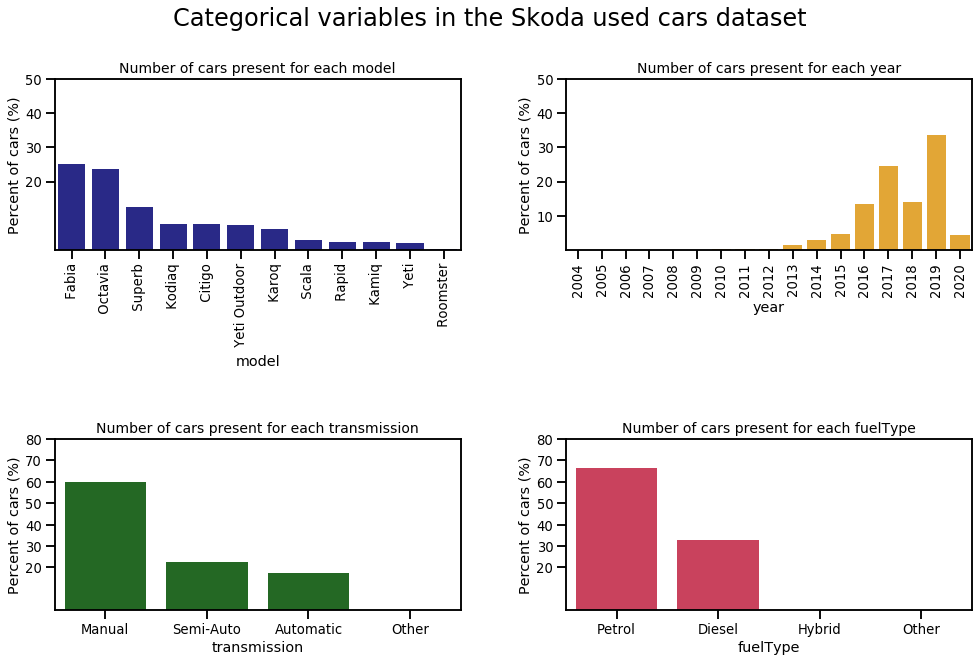

In [8]:
sns.set_context("talk", font_scale= 0.8)
plt.figure(figsize=(15,10))


# row 1, column 1
plt.subplot(2,2,1)
barplot(model_count, 'model', 'darkblue', 90, np.arange(20,51,10))

# row 1, column 2
plt.subplot(2,2,2)
barplot(year_count, 'year', 'orange', 90, np.arange(10,51,10))

# row 2, column 1
plt.subplot(2,2,3)
barplot(transmission_count, 'transmission', 'darkgreen', 0, np.arange(20,81,10))

# row 2, column 2
plt.subplot(2,2,4)
barplot(fuelType_count, 'fuelType', 'crimson', 0, np.arange(20,81,10))


# keep the individual plots separate from each other
plt.tight_layout(pad=4)


# write the title for all the plots
plt.suptitle('Categorical variables in the Skoda used cars dataset', fontsize=24, ha="center")
plt.subplots_adjust(top=0.88)

# display the plots
plt.show()

<h4> Displaying first 5 rows to get a clear conception of numerical and categorical columns of the dataset </h4>

In [9]:
df.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Octavia,2017,10550,Manual,25250,Petrol,54.3,1.4
1,Citigo,2018,8200,Manual,1264,Petrol,67.3,1.0
2,Octavia,2019,15650,Automatic,6825,Diesel,67.3,2.0
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,51.4,2.0
4,Superb,2019,18350,Manual,10912,Petrol,40.9,1.5


<h4> Here we can see: </h4> 

* model, year, transmission and fuelType are the categorical variables;

* price, mileage, mpg and engineSize are the numerical variables.

<h2>Creating scatterplot and trend line (regression) to visualize the relation between different numerical variables </h2>

* engineSize vs miles per gallon (mpg) and <br>

* mileage vs price

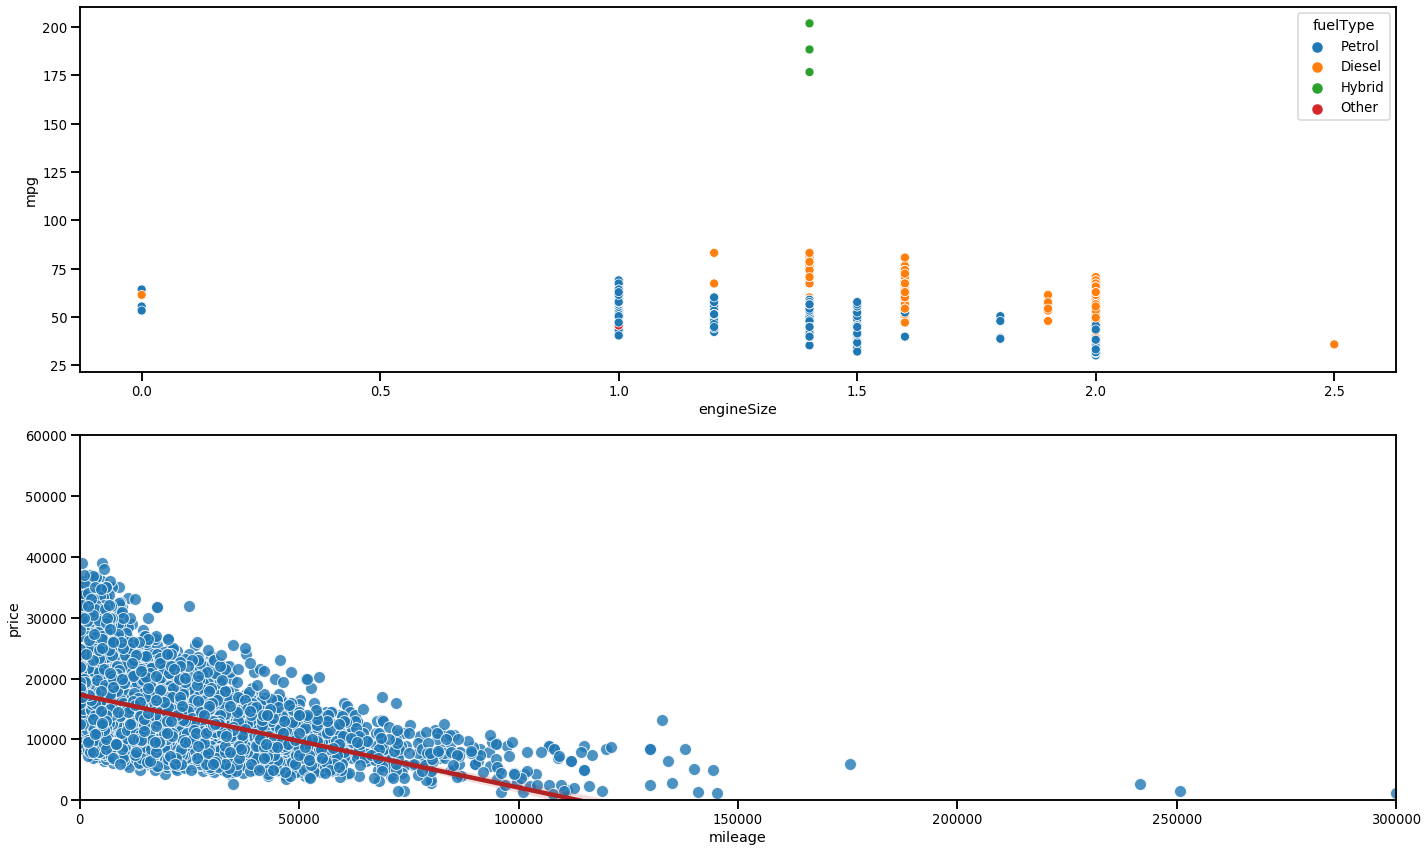

In [10]:
plt.figure(figsize=(20,12))

#engineSize vs mpg
plt.subplot(2,1,1)
sns.scatterplot(x='engineSize', y='mpg', data=df, hue= 'fuelType')


#trend line for mileage vs price
plt.subplot(2,1,2)
sns.set_context("poster", font_scale = 0.5)
sns.regplot(x='mileage', y='price', data=df, line_kws={'color':'firebrick'}, scatter_kws={'edgecolor':'white'})
plt.ylim(0, 60000)
plt.xlim(0,)


plt.tight_layout()
plt.show()

<h4>Remarks: </h4> <br>

* From the first plot (position 2,1,1) we can find that, for the same engine size the value of mpg (miles per gallon) flactuates for different type of fuels. Mpg value is higher for Diesel compared to that for Petrol and the highest is for Hybrid type of fuel. 

* While in the second plot (position 2,1,2) we see a trend line denoting an inverse relationship between mileage and price which somewhere hints the negative correlation in between them.

<h2>Creating Histogram using Seaborn</h2>

In [11]:
df.describe()

,year,price,mileage,mpg,engineSize
count,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000
mean,2017.502314,14275.449338,20118.452050,56.589165,1.433509
std,1.734754,6332.051106,19955.410762,12.037576,0.394800
min,2004.000000,995.000000,5.000000,30.100000,0.000000
25%,2017.000000,9495.000000,5812.500000,50.400000,1.000000
50%,2018.000000,12998.000000,14653.000000,57.700000,1.400000
75%,2019.000000,17990.000000,28000.000000,62.800000,2.000000
max,2020.000000,91874.000000,300000.000000,201.800000,2.500000


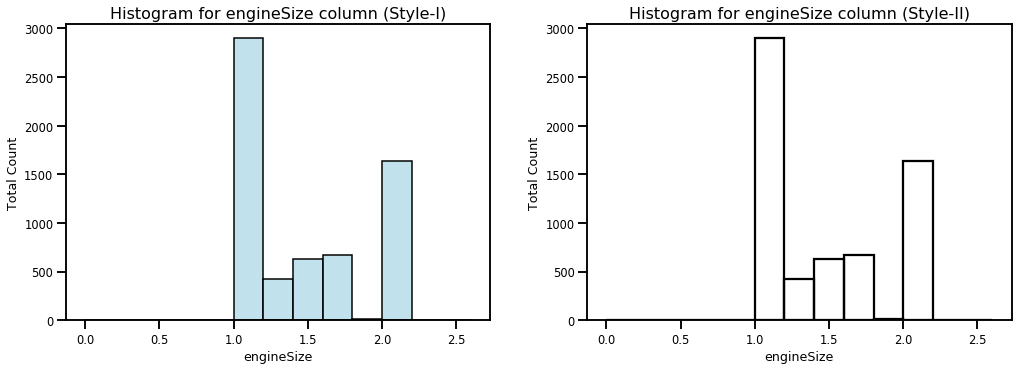

In [12]:
plt.figure(figsize=(15,6))

sns.set_context('talk', font_scale= 0.7)

plt.subplot(1,2,1)
sns.histplot(data=df, x='engineSize', binwidth= 0.2 ,  color= 'lightblue')
plt.title("Histogram for engineSize column (Style-I)", fontsize= '16')
plt.ylabel("Total Count")

plt.subplot(1,2,2)
sns.histplot(data=df, x='engineSize', binwidth= 0.2, color= 'black', fill= False)
plt.title("Histogram for engineSize column (Style-II)", fontsize= '16')
plt.ylabel("Total Count")

plt.tight_layout(pad= 3)
plt.show()

<h4>Remarks: </h4>

* Here we see the histogram for the 'engineSize' column of the dataset (in two diffrent styles). This <b>bimodal histogram </b> figure shows the total number of cars present for a particular range (0.2) of engine size. 


<br>

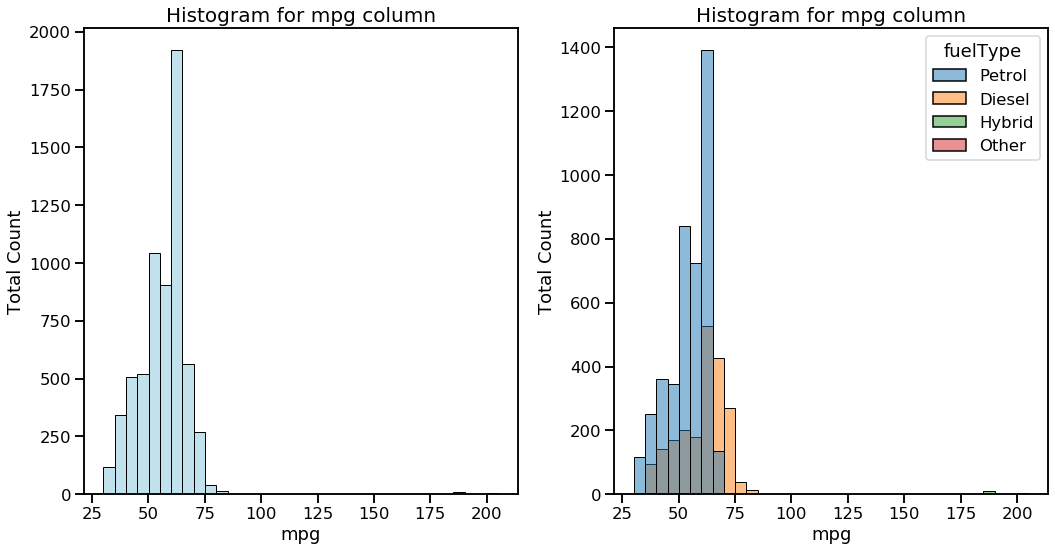

In [13]:
plt.figure(figsize=(15,8))
sns.set_context('talk')

plt.subplot(1,2,1)
sns.histplot(data=df, x='mpg', binwidth= 5,color= 'lightblue')
plt.title("Histogram for mpg column", fontsize= '20')
plt.ylabel("Total Count")

plt.subplot(1,2,2)
sns.histplot(data=df, x='mpg', binwidth= 5,color= 'lightblue', hue= 'fuelType')
plt.title("Histogram for mpg column", fontsize= '20')
plt.ylabel("Total Count")

plt.tight_layout()
plt.show()

<h4>Remarks:</h4>

* Here, we can see an <b>unimodal histogram </b> for the mpg column where the highest count is available for the 60-65 range for fueltype petrol. But the higher rate of mpg can be found for Diesel.



<h2>Distribution plot for numerical variable ('mpg' column) </h2>

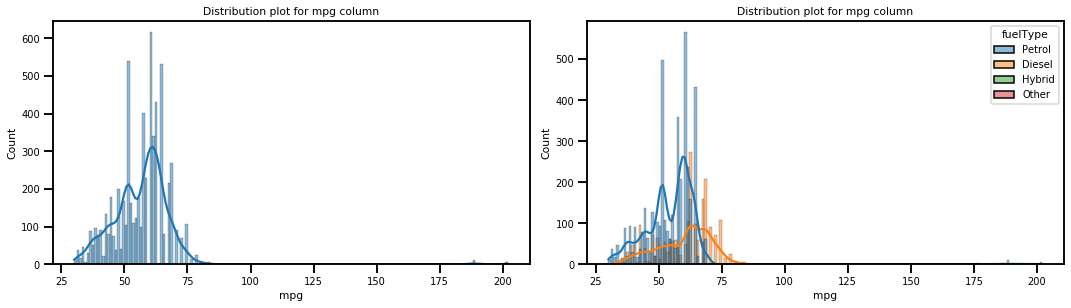

In [14]:
plt.figure(figsize=(15,12))
sns.set_context('talk', font_scale= 0.6)

plt.subplot(3,2,1)
sns.histplot(data=df, x='mpg', binwidth=1, kde= True)
plt.title("Distribution plot for mpg column")

plt.subplot(3,2,2)
sns.histplot(data=df, x='mpg', binwidth=1, hue= 'fuelType', kde= True)
plt.title("Distribution plot for mpg column")

plt.tight_layout()
plt.show()

<h4>Remarks:</h4>

* From the first and second plot we get an overview of mpg with respect to different fuel types. Here, we clearly find that, the total count is higher for 'Petrol' but the rate of mpg is always higher for 'Diesel' which demonstrates cars having Diesel as their fuel type are more efficient & powerful with a higher rate of mile per gallon (mpg).



<h2>ECDF plot for numerical variable ('mpg' column) </h2>

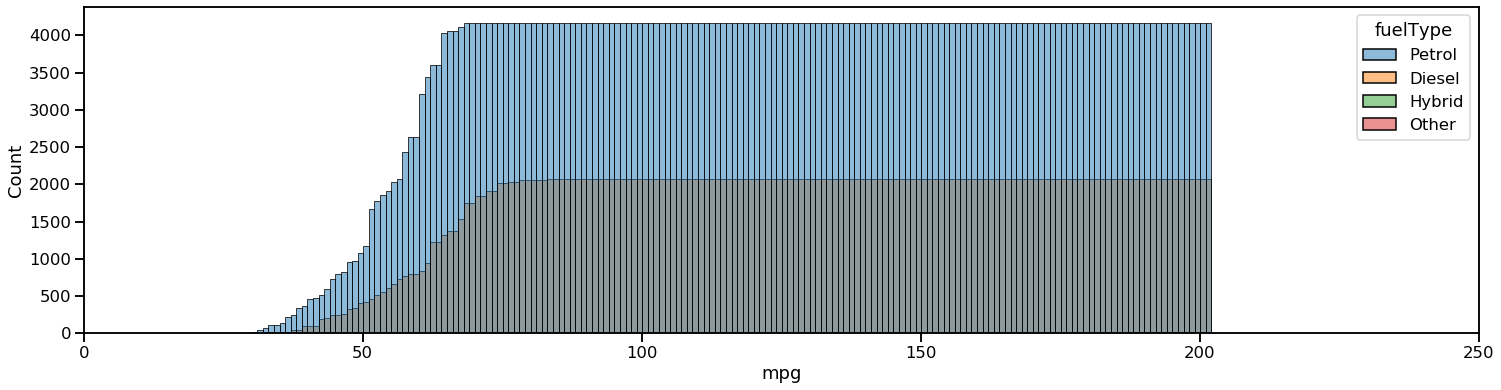

In [15]:
plt.figure(figsize=(25,6))
sns.set_context('talk')
sns.histplot(data=df, x='mpg', binwidth= 1, cumulative=True , hue= 'fuelType')
plt.xlim(0, 250)

plt.show()

<h4>Remarks:</h4>

* From this ECDF (Empirical Cumulative Distribution Function) plot we can easily guess the total counts are higher for petrol type of fuel but it does not clearly indicates about the change of mpg rate based on 'fuelType' like other two plots (histogram and distribution plot). That's why, using histogram or distribution plot in such kind of cases may be more fruitful than using ECDF plot.

